# Fragment spectrum generation
#### Generating theoretical fragment spectra is central to many identification tasks in computational mass spectrometry. 
#### "TheoreticalSpectrumGenerator" can be configured to generate tandem MS spectra from a given peptide charge combination. 
#### There are various parameters which influence the generated ions e.g. simulating different fragmentation techniques.

### First
### 1) Download uniprot-organism-yes.fasta from Uniprot.
### 2) Read uniprot-organism-yes.fasta.
### 3) Proteolytic Digestion with Trypsin

In [6]:
# import module
from pyopenms import *

dig = ProteaseDigestion()
dig.getEnzymeName() # Trypsin

# Read all Fasta File Record
bsa = "".join([l.strip() for l in open("uniprot-organism-yes.fasta").readlines() if l.startswith('>') == False])

# Converet to amino acid
bsa = AASequence.fromString(bsa)

# create all digestion products
result = []
dig.digest(bsa, result)

print(result[0].toString())

MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDK


## Y-ion spectrum

### Then, we will generate a simple spectrum that only contains y-ions as Following:

In [7]:
tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum() 
peptide = result[0] # MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDK

# standard behavior is adding b- and y-ions of charge 1
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")

tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MNGPVDGLCDHSLSEGVFMFTSESVGEGHPDK has 31 peaks.
y1+ is generated at m/z 147.112804913371
y2+ is generated at m/z 262.13974907287104
y3+ is generated at m/z 359.19251329617106
y4+ is generated at m/z 496.25142551947107
y5+ is generated at m/z 553.272889615171
y6+ is generated at m/z 682.315483838471
y7+ is generated at m/z 739.336947934171
y8+ is generated at m/z 838.405362221271
y9+ is generated at m/z 925.437391380771
y10+ is generated at m/z 1054.479985604071
y11+ is generated at m/z 1141.5120147635712
y12+ is generated at m/z 1242.5596939868713
y13+ is generated at m/z 1389.6281082739713
y14+ is generated at m/z 1520.6685932910711
y15+ is generated at m/z 1667.7370075781712
y16+ is generated at m/z 1766.8054218652712
y17+ is generated at m/z 1823.8268859609711
y18+ is generated at m/z 1952.8694801842712
y19+ is generated at m/z 2039.9015093437713
y20+ is generated at m/z 2152.9855736946715
y21+ is generated at m/z 2240.0176028541714
y22+ is generated at m/z 2377.0765150

### we could plot the output with adding the ion names as following: 

Text(0, 0.5, 'intensity')

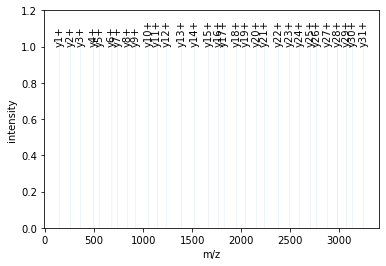

In [8]:
# import module
import matplotlib.pyplot as plt

mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0

for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
    
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")